In [4]:
#Library includes
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imshow, figure
import numpy as np
from scipy import ndimage, misc
import scipy.ndimage
#import scipy.ndimage as scipy
from PIL import Image
import cv2
import math
import os
import glob
#from pylsd import lsd
import sys
%matplotlib inline

# Global variables
#gray_scale_images = "/home/yordan/devel/python.assignments/notebooks"
source_directory = "images"
output_directory = "image_output"
# Global variables for the laplace function
ddepth = cv2.CV_16S
kernel_size = 3

os.listdir("images/")

['utm_00001.jpg', 'canny1.jpg']

In [5]:
#reading in an image
input_images = [cv2.imread(img_path)  for img_path in glob.glob("images/*")]

In [6]:
def showimage(img, cmap=None):
    figure(figsize=[12,12])
    imshow(np.asarray(img), cmap=cmap)

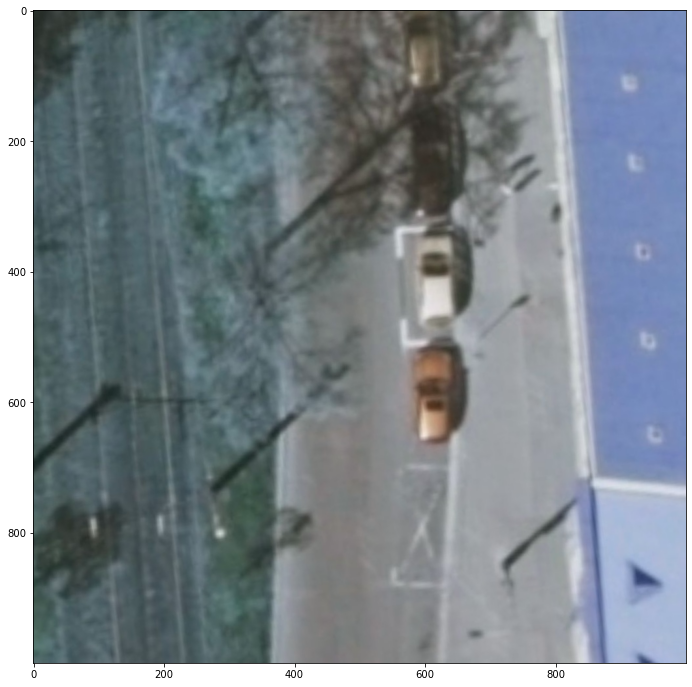

In [7]:
showimage(input_images[0])

In [8]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

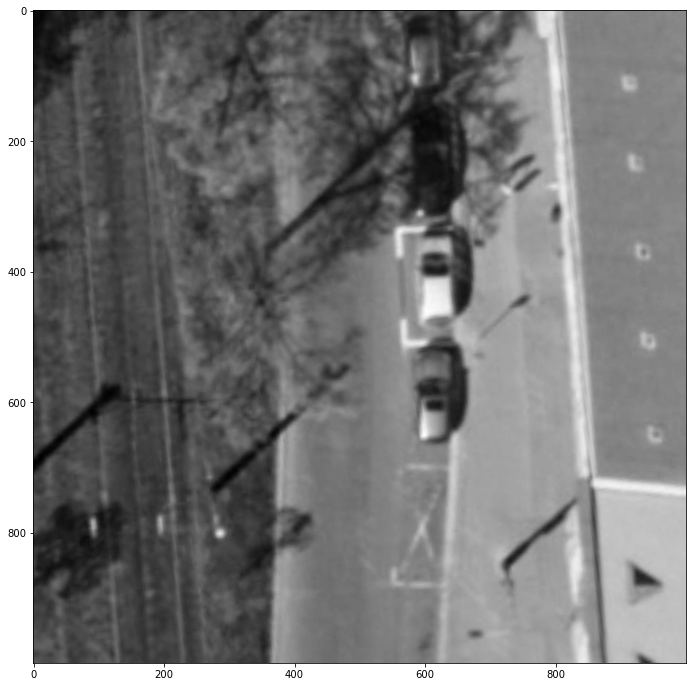

In [9]:
grayscaled_image = grayscale(input_images[0])
showimage(grayscaled_image, cmap="gray")

In [10]:
"""def resize(image): # Description:
                                                        # Reduce their image size
        dsize = (180, 180) # Dimenstion of the image after the resizing
        interpolation = cv2.INTER_LINEAR # The method of resizing
        new_image = cv2.resize(image, dsize, interpolation)
        return new_image"""

'def resize(image): # Description:\n                                                        # Reduce their image size\n        dsize = (180, 180) # Dimenstion of the image after the resizing\n        interpolation = cv2.INTER_LINEAR # The method of resizing\n        new_image = cv2.resize(image, dsize, interpolation)\n        return new_image'

In [11]:
def write_images_to_directory(image):
    cv2.imwrite(output_directory, image) # Write the image gray to a file with name"""

In [12]:
def gaussian_blur(img, kernel_size=5):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

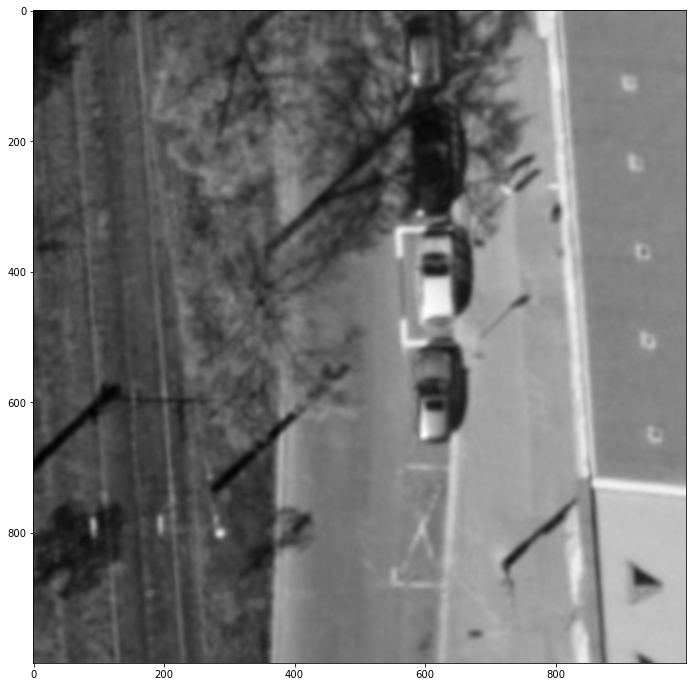

In [13]:
gaussian_blur_img = gaussian_blur(grayscaled_image, kernel_size=5)
showimage(gaussian_blur_img, cmap="gray")

In [14]:
grayscaled_image == gaussian_blur_img

array([[False,  True,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True],
       ...,
       [ True, False, False, ...,  True, False, False],
       [ True, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True,  True]])

In [15]:
def sobel(grayscaled_image):
    return scipy.ndimage.sobel(grayscaled_image)

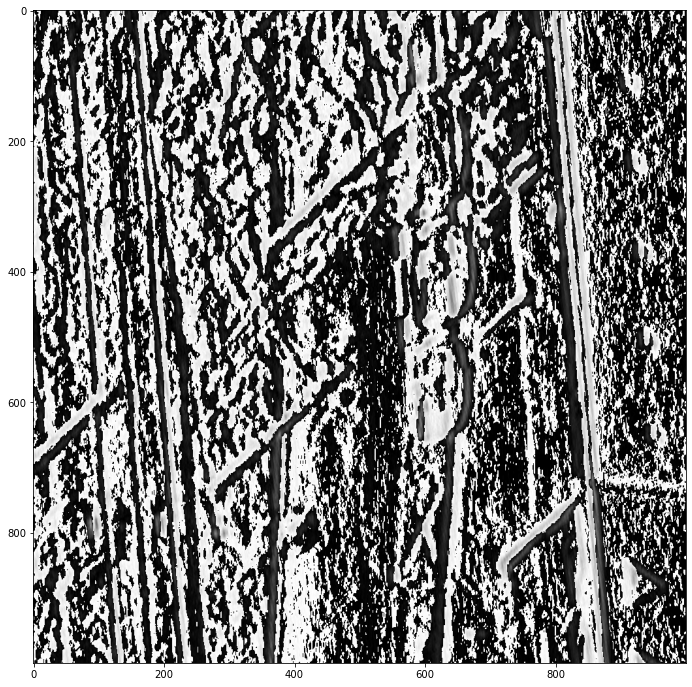

In [16]:
sobel_image = sobel(grayscaled_image)
showimage(sobel_image, cmap="gray")

In [17]:
def laplace(grayscaled_image):
    dst = cv2.Laplacian(grayscaled_image, ddepth, ksize=kernel_size)
    return dst

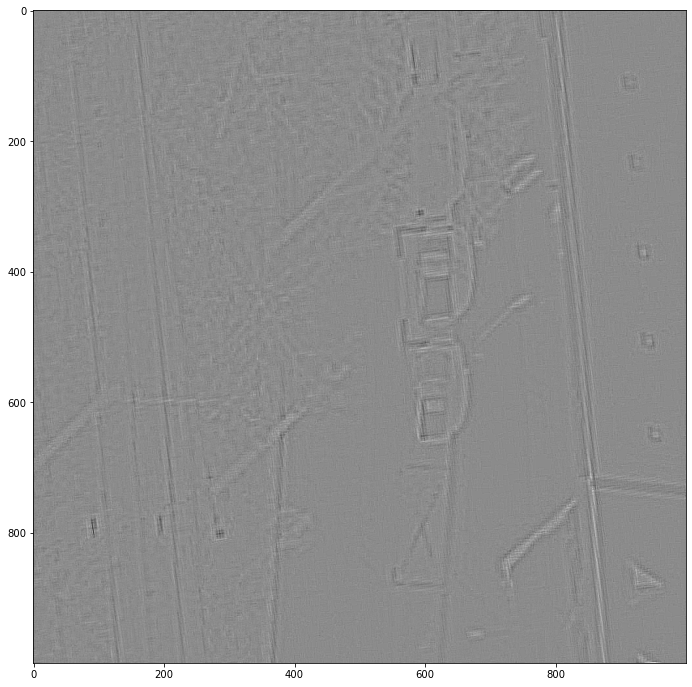

In [18]:
lapcace_image = laplace(grayscaled_image)
showimage(lapcace_image, cmap="gray")

In [19]:
def threshold_filter(image):
    img = cv2.imread('dave.jpg',0)
    ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
    ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
    ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
    ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
    titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
    images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
    for i in range(6):
        plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

In [20]:
#thresh1 = threshold_filter(input_images[0])
#showimage(thresh1)

In [21]:
def dilate(image):
    kernel = np.ones((5, 5), 'uint8')
    dilated_image = cv2.dilate(image, kernel, iterations=1)
    return dilated_image

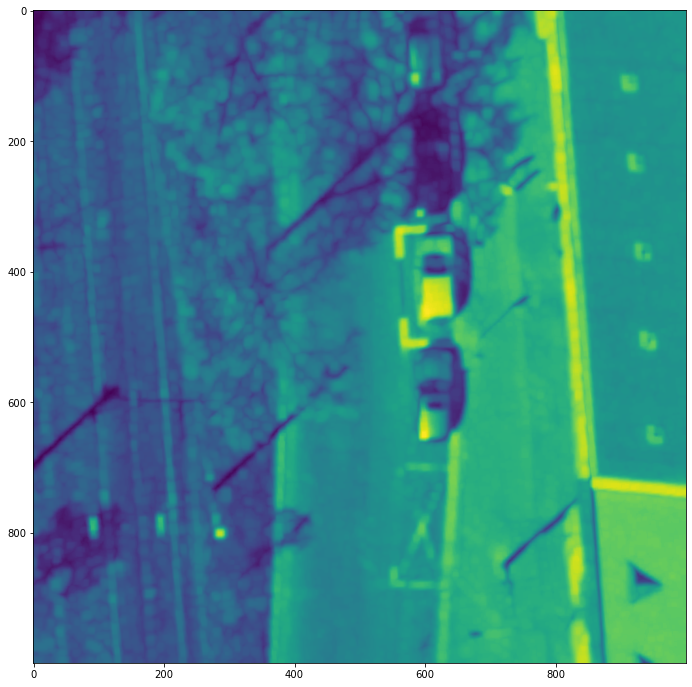

In [22]:
dilated_image = dilate(grayscaled_image)
showimage(dilated_image)

In [23]:
def erosion(grayscaled_image):
    kernel = np.ones((5, 5), 'uint8')
    erosed_image = cv2.erode(grayscaled_image, kernel, iterations = 1)
    return erosed_image

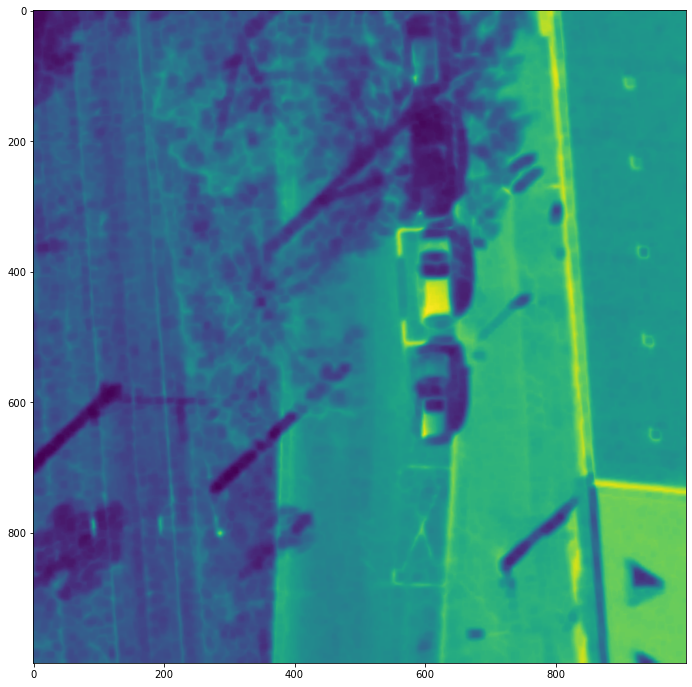

In [24]:
erosed_image = erosion(grayscaled_image)
showimage(erosed_image)

In [25]:
def hough_lines_p(grayscaled_image, original_image):
    # Probabilistic Line Transform
    linesP = cv2.HoughLinesP(grayscaled_image, 1, np.pi / 180, 50, None, 50, 10)
    
    # Draw the lines
    if linesP is not None:
        for i in range(0, len(linesP)):
            l = linesP[i][0]
            cv2.line(grayscaled_image, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
    
        # Show results
    cv2.imshow("Source", img)
    cv2.imshow("Detected Lines (in red) - Standard Hough Line Transform", grayscaled_image)
    cv2.imshow("Detected Lines (in red) - Probabilistic Line Transform", grayscaled_image)
    
    return img

In [26]:
hough_lines_p_image = hough_lines_p(input_images[0])
showimage(hough_lines_p_image)

TypeError: hough_lines_p() missing 1 required positional argument: 'original_image'

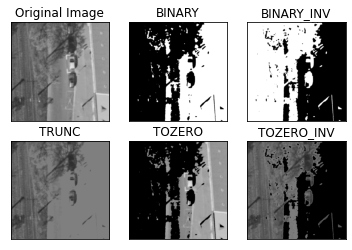

In [27]:
threshold_filter('dave.jpg')